# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.101323e+01     7.033571e+00
 * time: 0.002485036849975586
     1     2.913689e+01     5.143841e+00
 * time: 0.010982036590576172
     2     1.961748e+01     4.259902e+00
 * time: 0.021272897720336914
     3     1.384333e+01     3.608155e+00
 * time: 0.03154301643371582
     4     1.268529e+01     3.563151e+00
 * time: 0.03985309600830078
     5     1.048889e+01     2.367439e+00
 * time: 0.05010390281677246
     6     9.606069e+00     2.140189e+00
 * time: 0.05845308303833008
     7     8.902977e+00     1.507487e+00
 * time: 0.06677699089050293
     8     8.480209e+00     8.263086e-01
 * time: 0.07505297660827637
     9     8.303095e+00     9.582378e-01
 * time: 0.08337593078613281
    10     8.278963e+00     1.321858e+00
 * time: 0.08967304229736328
    11     8.255658e+00     8.749850e-01
 * time: 0.09594202041625977
    12     8.216641e+00     5.602986e-01
 * time: 0.10225987434387207
    13     8.139557e+00     6.117741e-01
 * ti

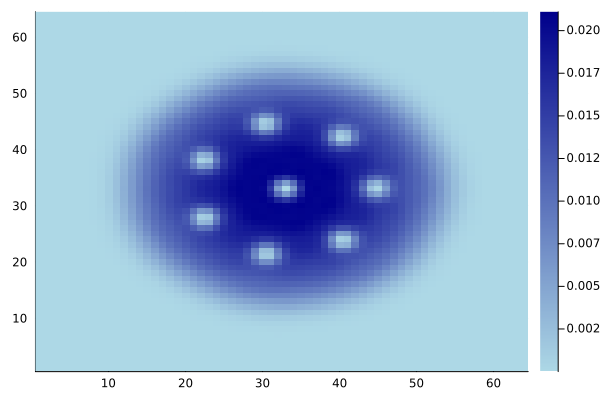

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)